In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [7]:
fase = pd.read_csv("C:/Users/luciana H/Desktop/YulietMira/UNIVERSIDAD/SEMESTRE 5/ANALISIS DE DATOS/Etapa 4/cleaned.csv", sep=",")

In [8]:
fase.columns
fase.info
fase.describe

<bound method NDFrame.describe of         Fever  Tiredness  Dry-Cough  Difficulty-in-Breathing  Sore-Throat  \
0           1          1          1                        1            1   
1           1          1          1                        1            1   
2           1          1          1                        1            1   
3           1          1          1                        1            1   
4           1          1          1                        1            1   
...       ...        ...        ...                      ...          ...   
316795      0          0          0                        0            0   
316796      0          0          0                        0            0   
316797      0          0          0                        0            0   
316798      0          0          0                        0            0   
316799      0          0          0                        0            0   

        None_Sympton  Pains  Nasal-Conges

array([[<Axes: title={'center': 'Fever'}>,
        <Axes: title={'center': 'Tiredness'}>,
        <Axes: title={'center': 'Dry-Cough'}>,
        <Axes: title={'center': 'Difficulty-in-Breathing'}>,
        <Axes: title={'center': 'Sore-Throat'}>],
       [<Axes: title={'center': 'None_Sympton'}>,
        <Axes: title={'center': 'Pains'}>,
        <Axes: title={'center': 'Nasal-Congestion'}>,
        <Axes: title={'center': 'Runny-Nose'}>,
        <Axes: title={'center': 'Diarrhea'}>],
       [<Axes: title={'center': 'None_Experiencing'}>,
        <Axes: title={'center': 'Age_0-9'}>,
        <Axes: title={'center': 'Age_10-19'}>,
        <Axes: title={'center': 'Age_20-24'}>,
        <Axes: title={'center': 'Age_25-59'}>],
       [<Axes: title={'center': 'Age_60+'}>,
        <Axes: title={'center': 'Gender_Female'}>,
        <Axes: title={'center': 'Gender_Male'}>,
        <Axes: title={'center': 'Gender_Transgender'}>,
        <Axes: title={'center': 'Severity_Mild'}>],
       [<Axes: 

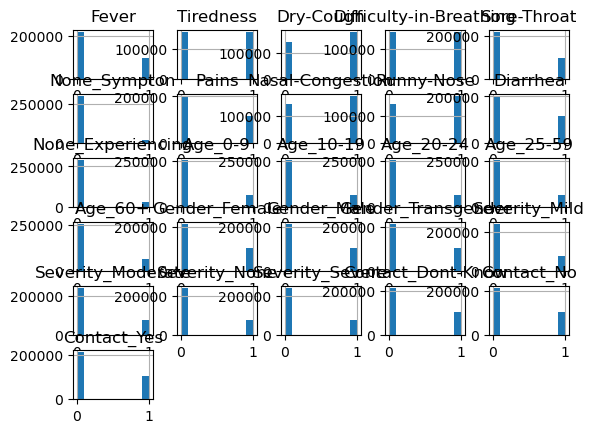

In [9]:
fase.hist()

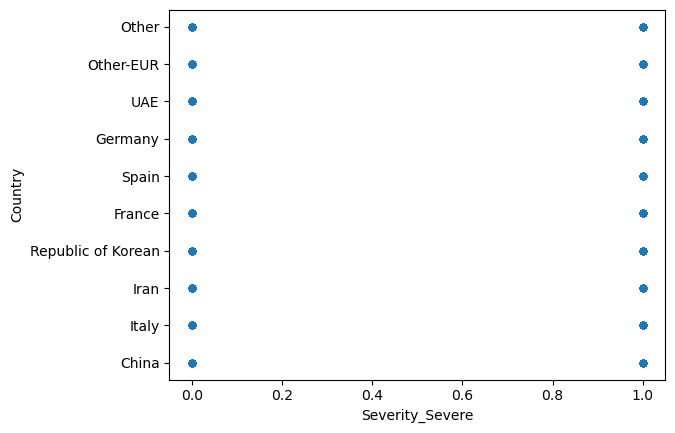

In [10]:
fase.plot.scatter(x="Severity_Severe", y="Country")
plt.show()

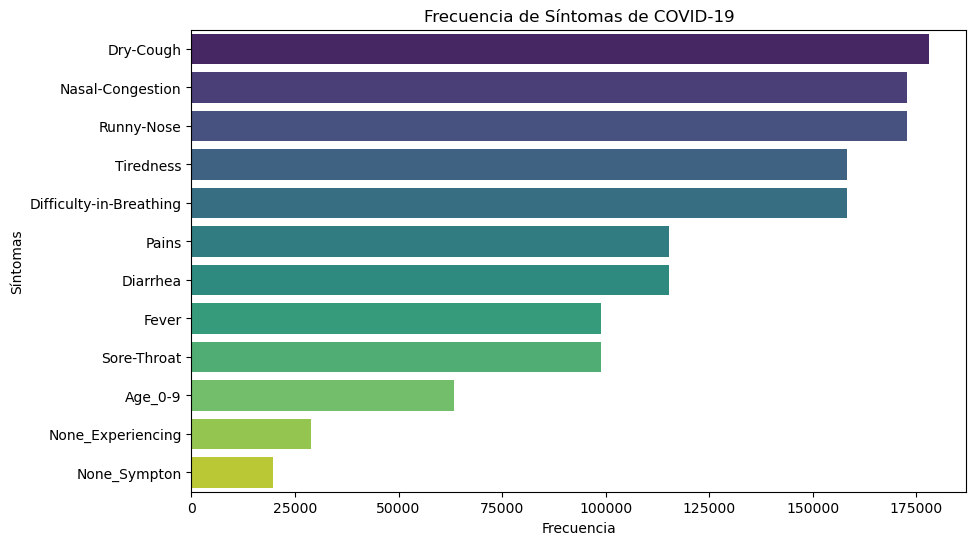

In [11]:
plt.figure(figsize=(10, 6))
symptoms_count = fase.iloc[:, :12].sum().sort_values(ascending=False)
sns.barplot(x=symptoms_count.values, y=symptoms_count.index, palette='viridis')
plt.title('Frecuencia de Síntomas de COVID-19')
plt.xlabel('Frecuencia')
plt.ylabel('Síntomas')
plt.show()

In [13]:
X = fase.drop('Country', axis=1) 
y = fase['Country']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
clf = DecisionTreeClassifier(random_state=42)

In [21]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [22]:
y_pred = clf.predict(X_test)

In [23]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [24]:
print(f'Accuracy: {accuracy}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)

Accuracy: 0.0

Confusion Matrix:
[[   0 6651 1979  568  181   63   12    3    2    2]
 [6631    0 1979  568  181   63   12    3    2    2]
 [6635 1978    0  568  181   63   12    3    2    2]
 [6638 2034  583    0  181   63   12    3    2    2]
 [6657 2029  588  173    0   63   12    3    2    2]
 [6794 1997  599  172   50    0   12    3    2    2]
 [6543 1995  586  143   53   17    0    3    2    2]
 [6782 1963  595  169   45   21    4    0    2    2]
 [6638 2041  565  198   61   21    6    1    0    2]
 [6659 2051  623  151   55   13    2    2    0    0]]

Classification Report:
                    precision    recall  f1-score   support

             China       0.00      0.00      0.00    9461.0
            France       0.00      0.00      0.00    9441.0
           Germany       0.00      0.00      0.00    9444.0
              Iran       0.00      0.00      0.00    9518.0
             Italy       0.00      0.00      0.00    9529.0
             Other       0.00      0.00      0.00  